#### Reading Data

In [71]:
import pandas as pd
weather_df = pd.read_csv('weather.csv', index_col="DATE")

#### Cleaning Data

In [72]:
# Calculating null percentage
null_pct = weather_df.apply(pd.isnull).sum() / weather_df.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.513066
ACSH       0.513015
AWND       0.259090
FMTM       0.487289
PGTM       0.378659
PRCP       0.000000
SNOW       0.000000
SNWD       0.000101
TAVG       0.664590
TMAX       0.000000
TMIN       0.000000
TSUN       0.998430
WDF1       0.513269
WDF2       0.487086
WDF5       0.491289
WDFG       0.740656
WDFM       0.999949
WESD       0.692545
WSF1       0.513117
WSF2       0.487086
WSF5       0.491340
WSFG       0.622050
WSFM       0.999949
WT01       0.629950
WT02       0.934873
WT03       0.933050
WT04       0.982579
WT05       0.981566
WT06       0.990783
WT07       0.994531
WT08       0.800111
WT09       0.992910
WT11       0.999291
WT13       0.889345
WT14       0.955080
WT15       0.997873
WT16       0.666920
WT17       0.996961
WT18       0.940899
WT19       0.999949
WT21       0.999747
WT22       0.997518
WV01       0.999949
dtype: float64

In [73]:
# Only keeping those columns where the null percent is low ( less than 5% )
valid_columns = weather_df.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [74]:
weather_df = weather_df[valid_columns].copy()

In [75]:
weather_df.columns = weather_df.columns.str.lower()
weather_df

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19


In [76]:
# Filling in the still missing values
weather_df = weather_df.ffill() # forward fill

In [77]:
weather_df.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

We now have no Null values in the dataset

#### Getting the columns as proper datatypes

In [78]:
weather_df.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

Columns seem to be of the correct type

In [79]:
weather_df.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18',
       '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23'],
      dtype='object', name='DATE', length=19746)

#### Converting index to Datetime 

In [80]:
weather_df.index = pd.to_datetime(weather_df.index)

#### Preparing the data for the ML model


Generating a target column in the data by shifting values by 1.

In [81]:
"""
Target column will have the max temp of the next day. This is a sort of prediction column
that our ML model will try to populate later on ( which is basically predicting the weather ).
"""
weather_df["target"] = weather_df["tmax"].shift(-1)
weather_df

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25,26.0
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18,32.0
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19,36.0


In [82]:
weather_df.ffill()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25,26.0
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18,32.0
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19,36.0


#### Model

In [83]:
from sklearn.linear_model import Ridge # Because it is useful when dealing with multicollinearity

rr = Ridge(alpha=0.1)

In [84]:
predictor_columns = weather_df.columns[~weather_df.columns.isin(["target", "station", "name"])]

In [85]:
# Accounting for time-series nature of data ( cannot use future data to predict past data )
def backtest(weather, model, predictors, start=3650, step=90):
    # Each element is a df that has prediction for 90 days
    all_predictions = []

    # Starting from 10 years and increasing in 90 day steps
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i: (i+step), :] # next 90 days

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [86]:
predictions = backtest(weather_df, rr, predictor_columns)

In [92]:
predictions = predictions.ffill()

#### Metrics !

In [93]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.136642525697675

#### Improving Accuracy

In [94]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather_df = compute_rolling(weather_df, horizon, col)

In [96]:
weather_df = weather_df.iloc[14:, :] # Cutting out rows with missing values
weather_df

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,NaN,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,NaN,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25,26.0,30.000000,0.100000,21.666667,0.153846,0.003333,2.0,41.142857,-0.197917,29.214286,-0.144254,0.307857,-0.967517
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18,32.0,30.666667,-0.152174,21.666667,-0.169231,0.003333,-1.0,40.214286,-0.353464,28.571429,-0.370000,0.269286,-1.000000
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19,36.0,30.333333,0.054945,20.666667,-0.080645,0.003333,-1.0,39.714286,-0.194245,27.428571,-0.307292,0.249286,-1.000000


In [97]:
weather_df = weather_df.fillna(0)

In [98]:
weather_df

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,0.0,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,0.0,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25,26.0,30.000000,0.100000,21.666667,0.153846,0.003333,2.0,41.142857,-0.197917,29.214286,-0.144254,0.307857,-0.967517
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18,32.0,30.666667,-0.152174,21.666667,-0.169231,0.003333,-1.0,40.214286,-0.353464,28.571429,-0.370000,0.269286,-1.000000
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19,36.0,30.333333,0.054945,20.666667,-0.080645,0.003333,-1.0,39.714286,-0.194245,27.428571,-0.307292,0.249286,-1.000000


In [99]:
def expand_mean(df):
    return df.expanding(1).mean()

"""
Grouping all the averages of following column for that (month and day) in previous years
"""
for col in ["tmax", "tmin", "prcp"]:
    weather_df[f"month_avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys=False).apply(expand_mean)
    weather_df[f"day_avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys=False).apply(expand_mean)


In [100]:
weather_df

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.3,0.0,33,25,26.0,30.000000,0.100000,...,29.214286,-0.144254,0.307857,-0.967517,39.281120,38.200000,26.416319,25.054545,0.109232,0.099818
2024-01-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,18,32.0,30.666667,-0.152174,...,28.571429,-0.370000,0.269286,-1.000000,39.273214,38.327273,26.411310,25.090909,0.109167,0.131091
2024-01-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,32,19,36.0,30.333333,0.054945,...,27.428571,-0.307292,0.249286,-1.000000,39.268888,35.618182,26.406901,22.563636,0.109102,0.099636


Rerunning model with all the new predictors

In [102]:
predictor_columns = weather_df.columns[~weather_df.columns.isin(["target", "station", "name"])]
predictor_columns

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [106]:
predictions = backtest(weather_df, rr, predictor_columns)

In [105]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.791342858954086

<Axes: xlabel='diff'>

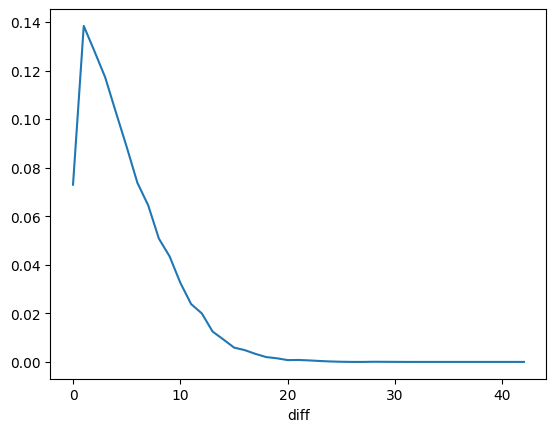

In [109]:
# Graph for how many times we made an error and what was the magnitude of the error
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()